# 01: Critic Networkの出力の量子化

### 概要
+ Critic Networkはロボットハンドの各時間ごとの角度を出力する.
+ そのまま学習しても投射にならないため, 角度を曲げる, 伸ばす, そのままに変換する [-1,0,1,].

### ToDo
+ シンプルに曲げる/曲げない/そのままでOKなのか？
+ 値の変化幅を決めるために, 各時刻毎の値の差分の分布を確認する.

## 1-1: 差分の分布の確認

In [3]:
import os
import pandas as pd
import numpy as np
import h5py

filename = os.path.join("/root/dataStore", "tmp2", "episodes", "epoch0.h5")
with h5py.File(filename, 'r') as f:
    A = np.array(f["action"],)
    
print(A.shape)

(10, 2, 100, 20)


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook", "whitegrid", font_scale=1.5)

X = A[:,:,1:,:] - A[:,:,:-1,:]
X = X.reshape((-1,X.shape[-1],))
print(X.shape)


(1980, 20)


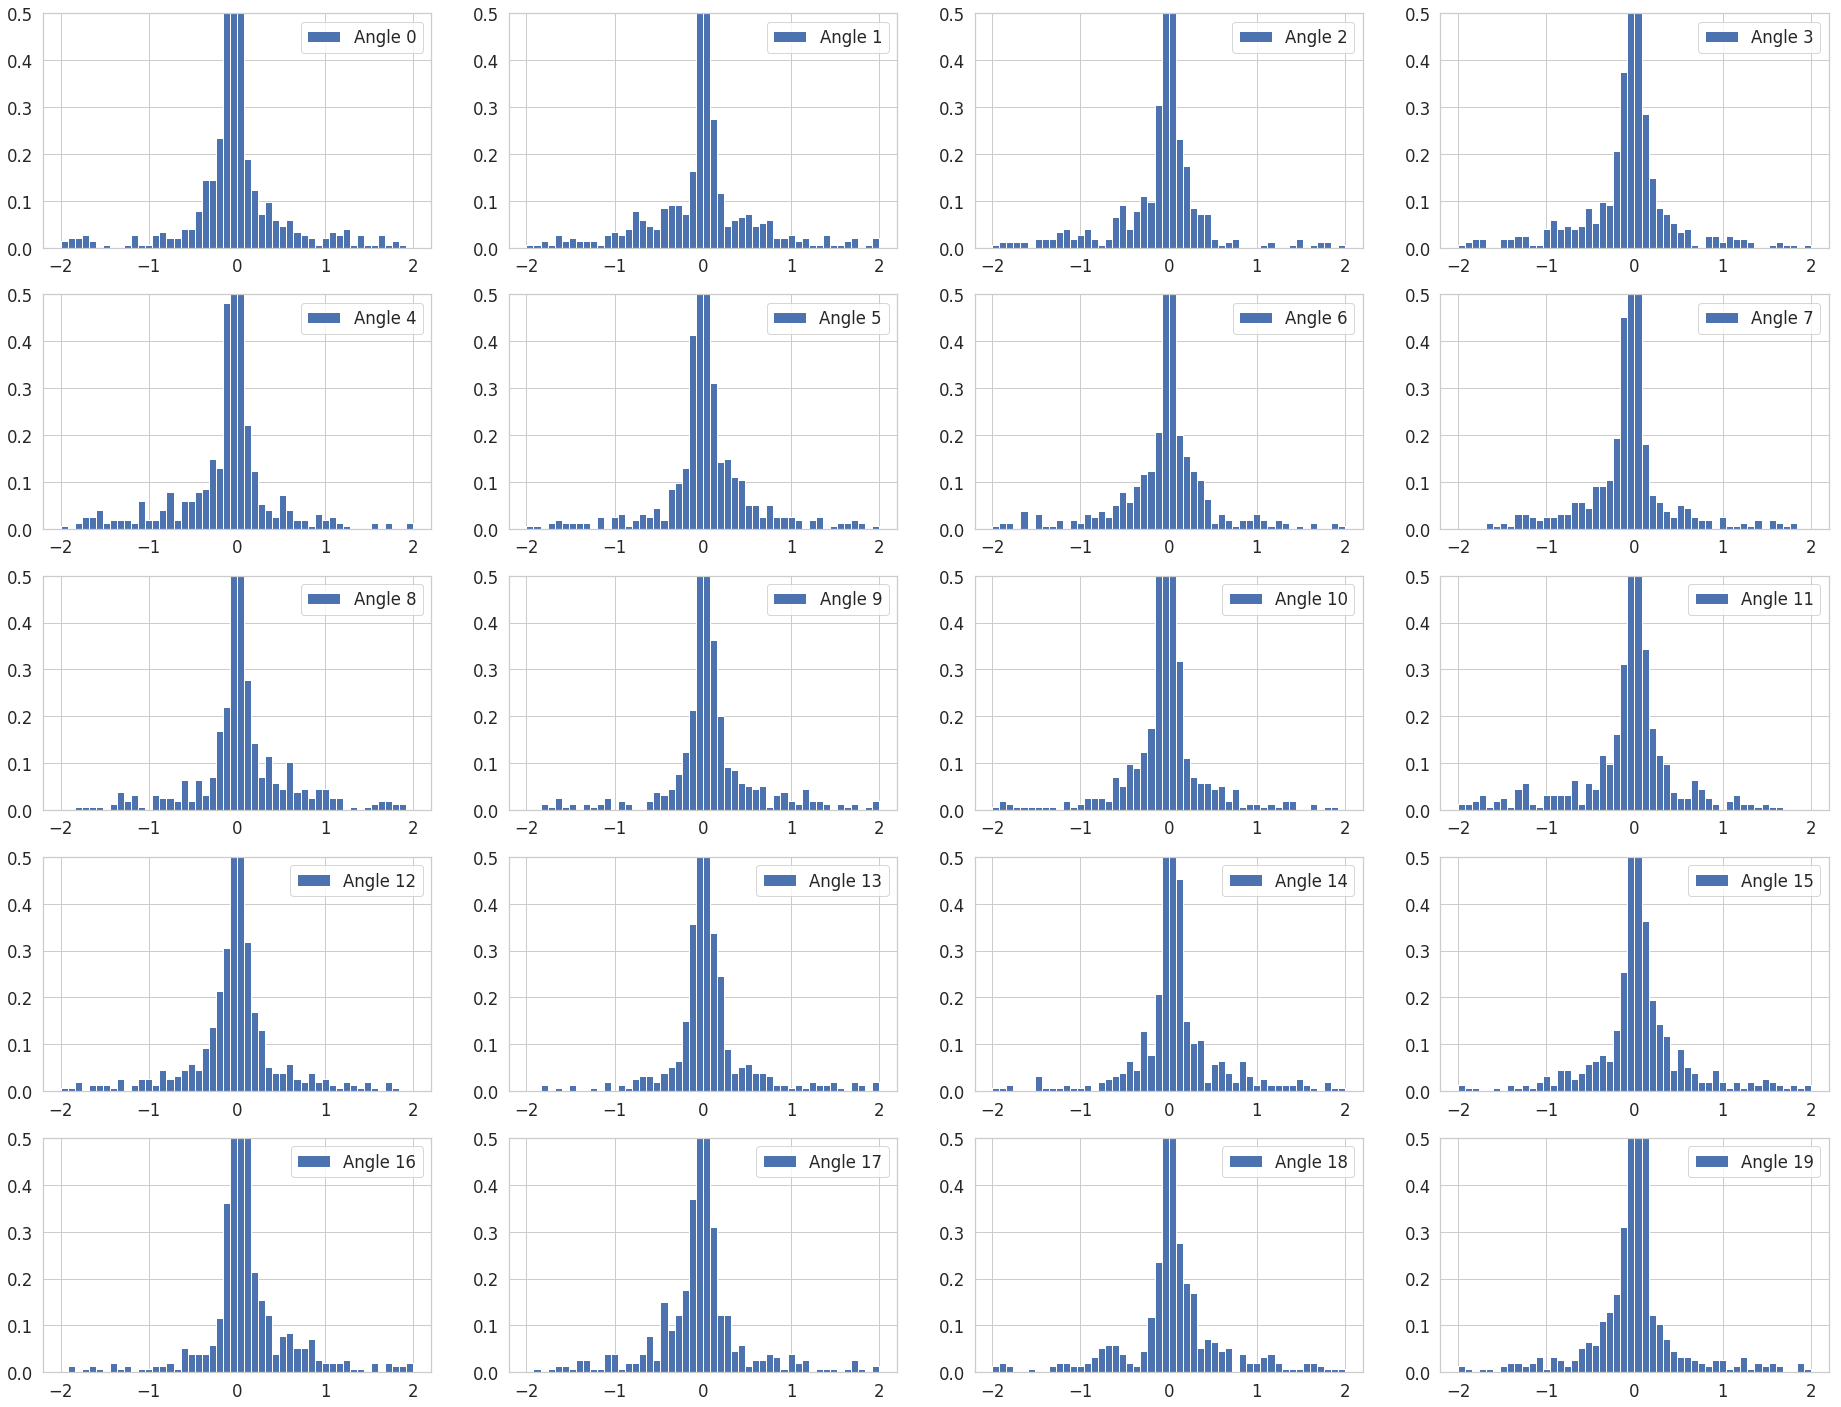

In [47]:
row, col = 5, 4

plt.figure(figsize=(8*col,5*row))
for no in range(20):
    plt.subplot(row, col, no+1)
    plt.hist(X[:, no]*(180./np.pi), density=True, bins=50, range=(-2,2), label="Angle {}".format(no))
    # plt.ylim([0,0.05])
    #plt.xlim([-45.,45.])
    #plt.xlim([-1,1.])
    plt.ylim([0,0.5])
    plt.legend()

plt.show()